In [1]:
import pandas as pd
import numpy as np

In [2]:
transaction = pd.read_csv('./cleaned_crypto_fraud.csv')

In [3]:
n_fraud, fraud = transaction['fraud'].value_counts()
n_fraud

335847

In [4]:
fraud

91778

In [5]:
print(f"Fraud Percentage {fraud/len(transaction['fraud']) * 100:0.2f}%")
print(f"Not Fraud Percentage {n_fraud/len(transaction['fraud']) * 100:0.2f}%")

Fraud Percentage 21.46%
Not Fraud Percentage 78.54%


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
clf = RandomForestClassifier(n_estimators=100)

In [8]:
x = transaction.drop('fraud', axis = 1)
y = transaction['fraud']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [11]:
clf.score(x_test, y_test)

0.9854428529669688

In [12]:
transaction.dtypes

Unnamed: 0            int64
balance             float64
rec/sent              int64
amount              float64
block_id              int64
size                  int64
weight                int64
version               int64
lock_time             int64
is_coinbase           int64
has_witness           int64
input_count           int64
output_count          int64
input_total           int64
input_total_usd     float64
output_total          int64
output_total_usd    float64
fee                   int64
fee_usd             float64
fee_per_kb          float64
fee_per_kb_usd      float64
fee_per_kwu         float64
fee_per_kwu_usd     float64
cdd_total           float64
fraud                 int64
dtype: object

In [13]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [14]:
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [15]:
clf.score(x_test, y_test)

0.9854311604793919

In [16]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Separate features and target variable
X = transaction.drop(columns=['fraud'])
y = transaction['fraud']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust ratio as needed
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print new class distribution
print("After SMOTE: Fraud Cases:", sum(y_train_resampled == 1))
print("After SMOTE: Not Fraud Cases:", sum(y_train_resampled == 0))


After SMOTE: Fraud Cases: 134339
After SMOTE: Not Fraud Cases: 268678


In [18]:
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [19]:
clf.score(X_test, y_test)

0.984121601870798

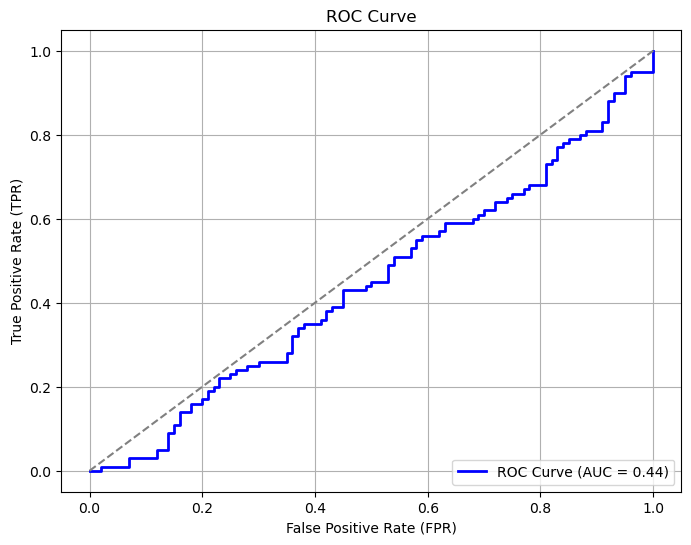

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# y_test: True labels (0 = Not Fraud, 1 = Fraud)
# y_prob: Predicted probabilities from the model

# Example values (replace with actual y_test and y_prob)
np.random.seed(42)
y_test = np.random.randint(0, 2, 200)  # Simulating 200 test samples
y_prob = np.random.rand(200)  # Simulating probability scores

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [21]:
random_transaction = transaction.sample(n=2000, random_state=42) 
x = random_transaction.drop('fraud', axis=1)
y = random_transaction['fraud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.975